In [10]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import re

In [11]:
def str_to_date(text: str):
    if text and re.match(r'\d{4}-\d{2}-\d{2}', text):
        return pd.to_datetime(text, errors='coerce')
    return pd.to_datetime('2025-01-10', errors='coerce')

In [12]:
FILE = './data/append.xlsx'

df = pd.read_excel(FILE)

df = df.drop_duplicates(subset='link')

df['scrapped_comments'] = df['comments_text'].apply(lambda x: len(str(x).split('|')))
total_comments = df['scrapped_comments'].sum()
print(f'Total comments: {total_comments}')

Total comments: 23465


In [13]:
df['date'] = df['date'].astype(str)

dates = df['date'].apply(lambda x: str_to_date(x))
df['date'] = dates
first_date = dates.min()
last_date = dates.max()

print(f'First date: {first_date} | Last date: {last_date}')

First date: 2020-12-12 00:00:00 | Last date: 2025-01-10 00:00:00


In [14]:
stop_words = set(stopwords.words('spanish'))
stop_words.add('-')
stop_words.add('|')

Text(38.347222222222214, 0.5, 'Comments')

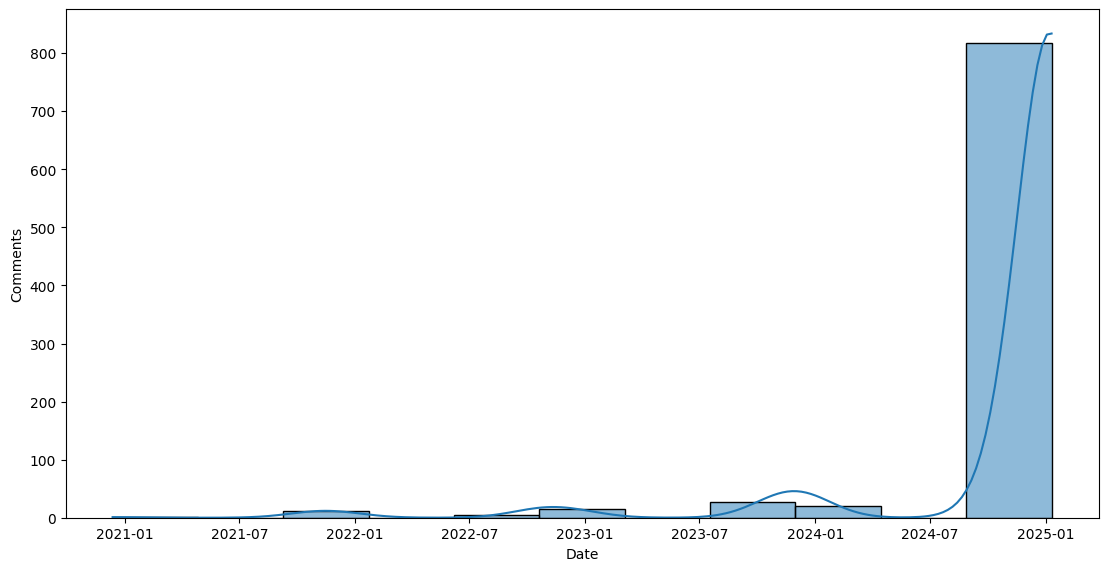

In [15]:
#plot gauss distribution of dates
sns.histplot(dates, kde=True)
plt.tight_layout()
plt.gcf().set_size_inches(12, 6)
plt.xlabel('Date')
plt.ylabel('Comments')

/var/folders/wy/yk4g6s5x4zbbmw664n4m40040000gn/T/ipykernel_99208/1796172140.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month-year', y='scrapped_comments', data=df_group_month, palette=colors)


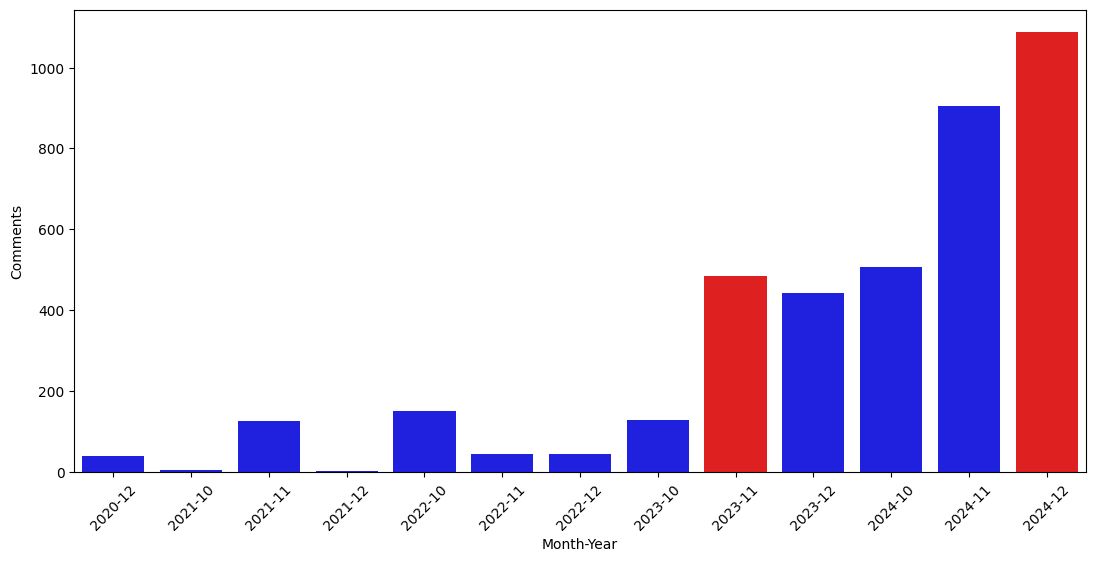

In [16]:
df['month-year'] = df['date'].dt.to_period('M')
df_group_month = df.groupby('month-year').agg({'scrapped_comments': 'sum'}).reset_index()
df_group_month = df_group_month[df_group_month['month-year'] != '2025-01']

sns.barplot(x='month-year', y='scrapped_comments', data=df_group_month)
plt.xticks(rotation=45)
plt.tight_layout()
plt.gcf().set_size_inches(12, 6)
plt.xlabel('Month-Year')
plt.ylabel('Comments')

#change color of 9 and 13 bar to red
colors = ['blue' if x != 9 and x != 13 else 'red' for x in range(1, 14)]
sns.barplot(x='month-year', y='scrapped_comments', data=df_group_month, palette=colors)
plt.show()

In [17]:
def print_plot(target_month: str, min_length_word: int = 4, num_bar: int = 60):
  print(f'-'*50)
  for target_columns in ['comments_text', 'description']:
    
    df[target_columns] = df[target_columns].apply(lambda x: str(x).lower())
    df[target_columns] = df[target_columns].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and not str(word).startswith('#') and not str(word).startswith('@') and len(word) > min_length_word]))

    df['month-year'] = df['date'].dt.to_period('M')
    df_group_comments = df.groupby('month-year').agg({target_columns: ' '.join}).reset_index()

    #print description of rows of '2023-11'
    words = df_group_comments[df_group_comments['month-year'] == target_month][target_columns].values[0]

    dict_words = {}

    for word in words.split():
        if word not in dict_words:
            dict_words[word] = 1
        else:
            dict_words[word] += 1

    df_words = pd.DataFrame(dict_words.items(), columns=['word', 'count'])
    df_words = df_words.sort_values(by='count', ascending=False)
    df_words = df_words.head(num_bar)

    sns.barplot(data=df_words, x='word', y='count')
    plt.tight_layout()
    plt.gcf().set_size_inches(12, 6)
    plt.xlabel('Word')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    print(f'Plotting {target_columns} of {target_month}')
    plt.show()

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict_words)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    print(f'Wordcloud of {target_columns} of {target_month}')
    plt.show()

--------------------------------------------------
Plotting comments_text of 2023-11


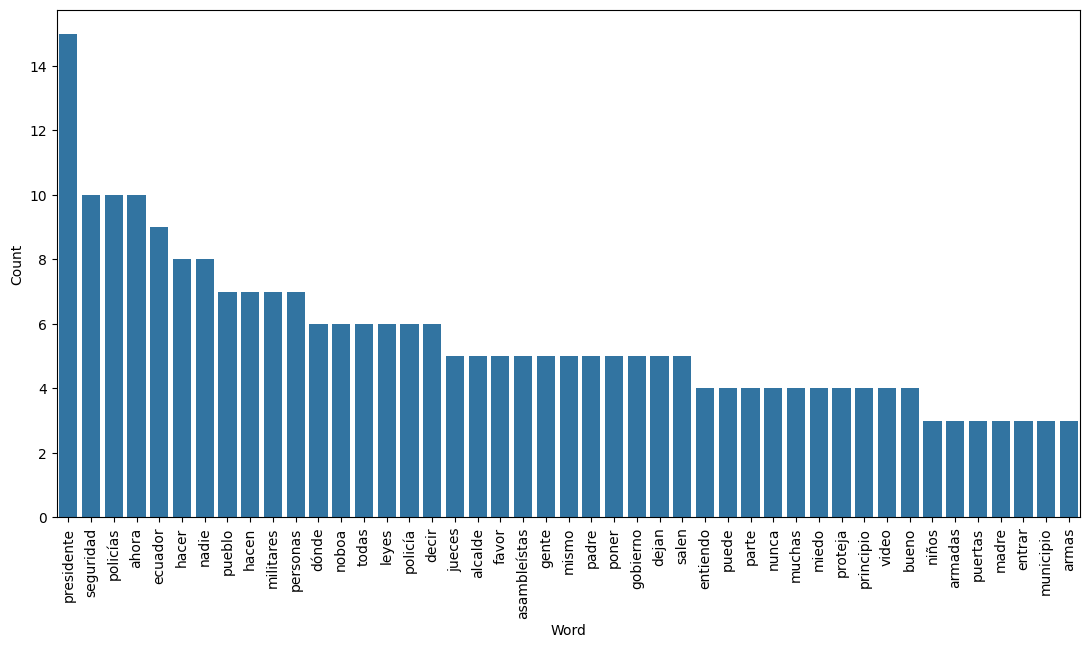

Wordcloud of comments_text of 2023-11


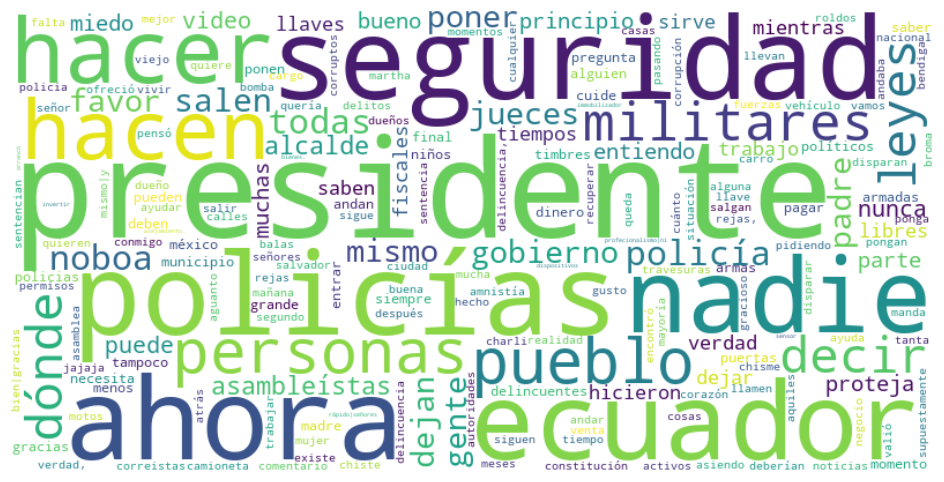

Plotting description of 2023-11


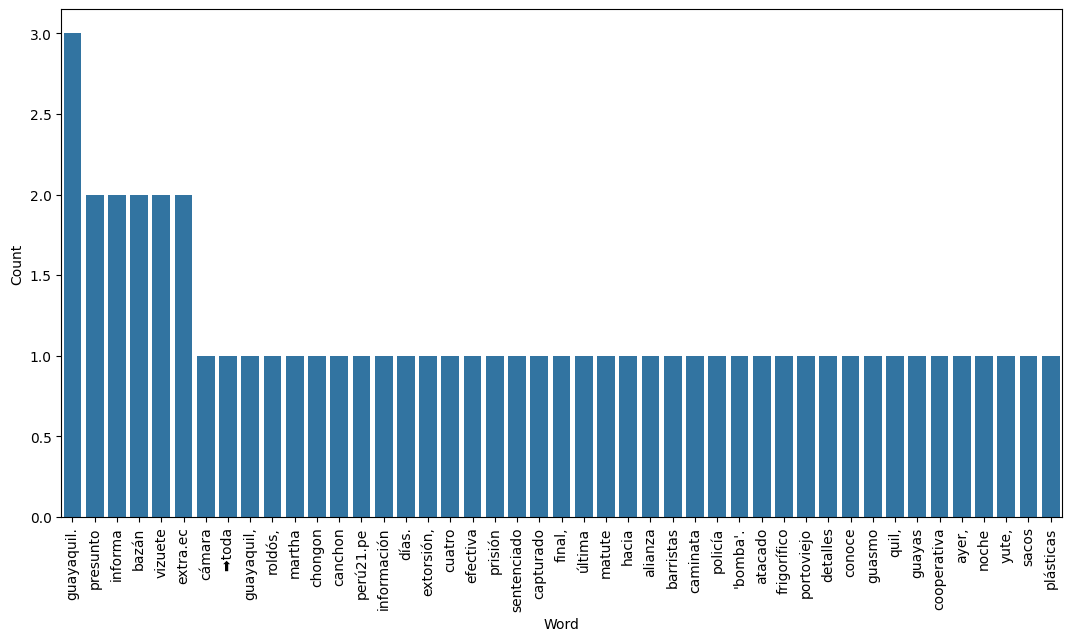

Wordcloud of description of 2023-11


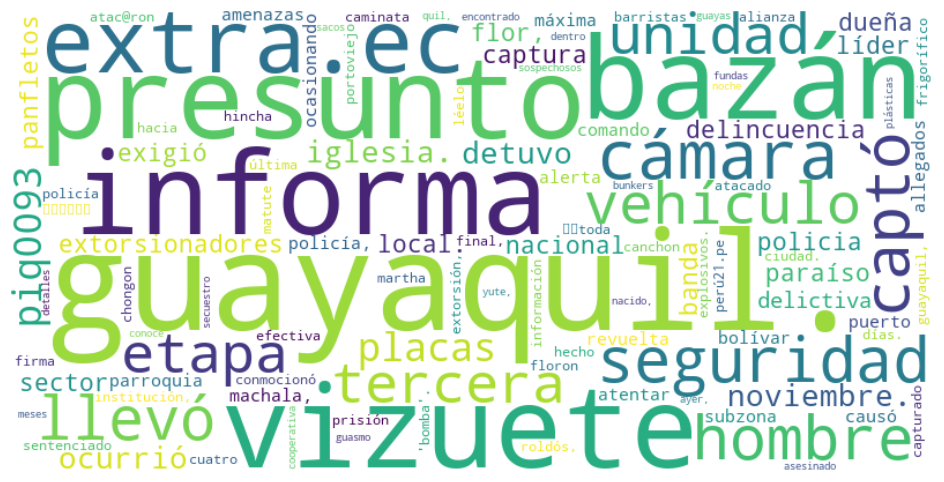

--------------------------------------------------
Plotting comments_text of 2024-11


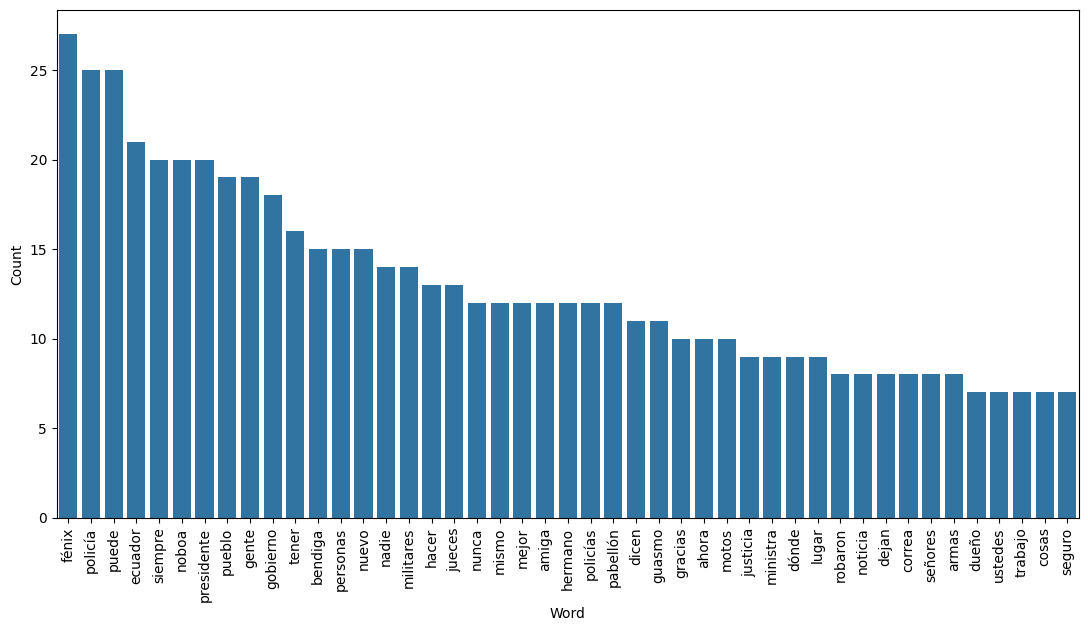

Wordcloud of comments_text of 2024-11


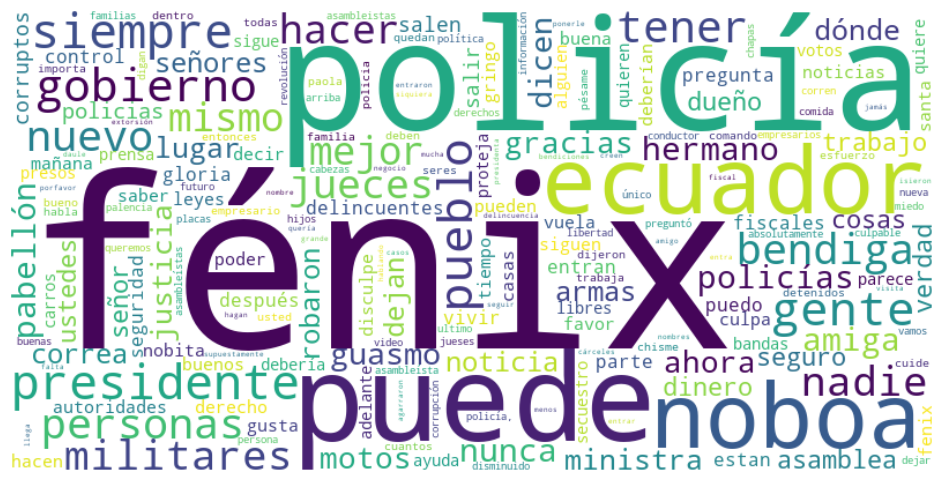

Plotting description of 2024-11


/var/folders/wy/yk4g6s5x4zbbmw664n4m40040000gn/T/ipykernel_99208/1889012491.py:27: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/yk4g6s5x4zbbmw664n4m40040000gn/T/ipykernel_99208/1889012491.py:27: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/yk4g6s5x4zbbmw664n4m40040000gn/T/ipykernel_99208/1889012491.py:27: UserWarning: Glyph 128659 (\N{POLICE CAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jolyne/miniforge3/envs/scrapping/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jolyne/miniforge3/envs/scrapping/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canva

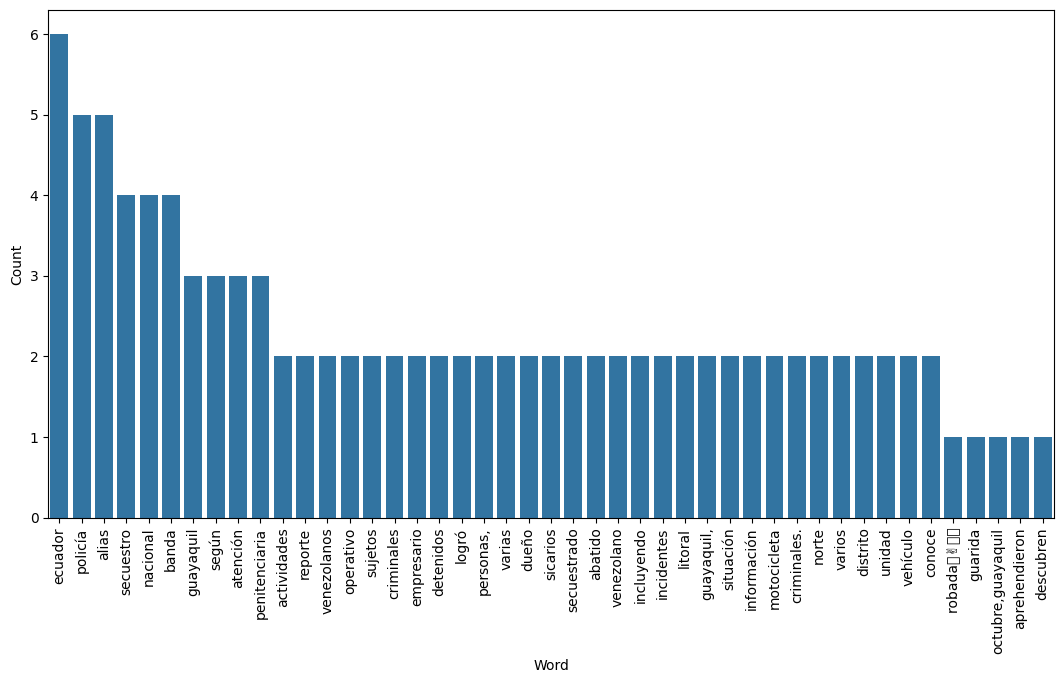

Wordcloud of description of 2024-11


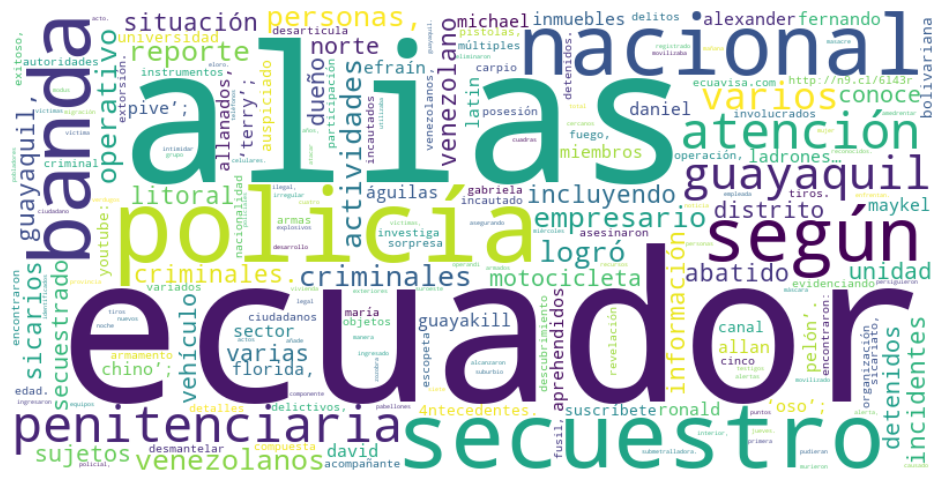

--------------------------------------------------
Plotting comments_text of 2024-12


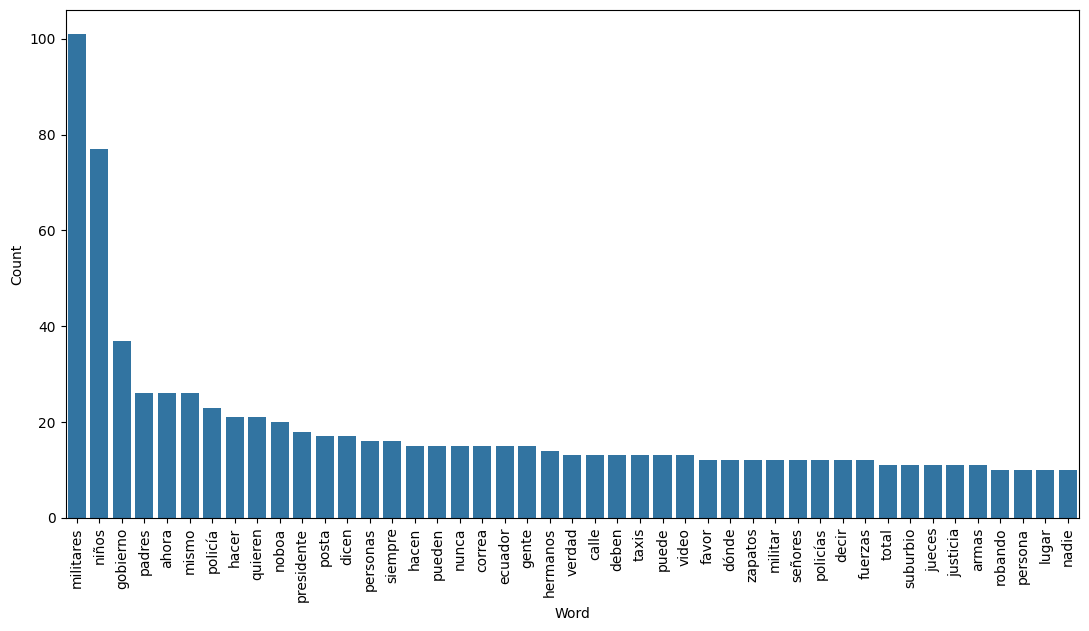

Wordcloud of comments_text of 2024-12


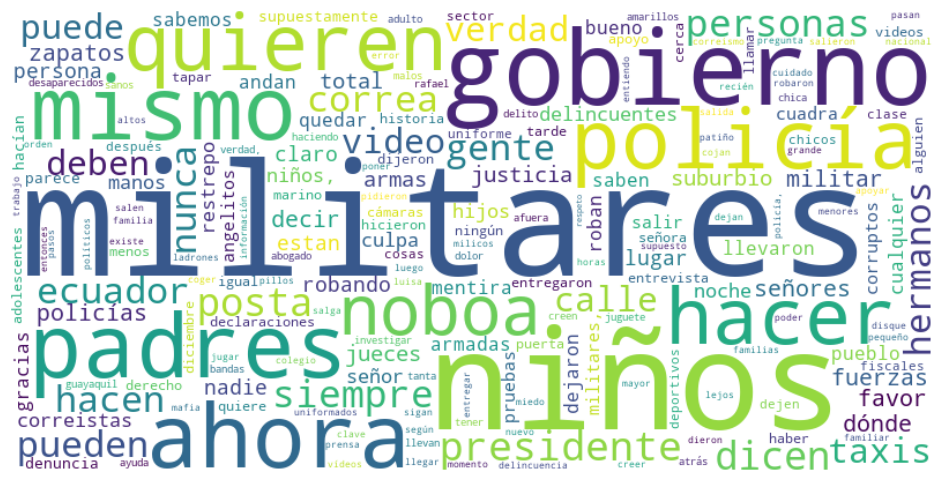

Plotting description of 2024-12


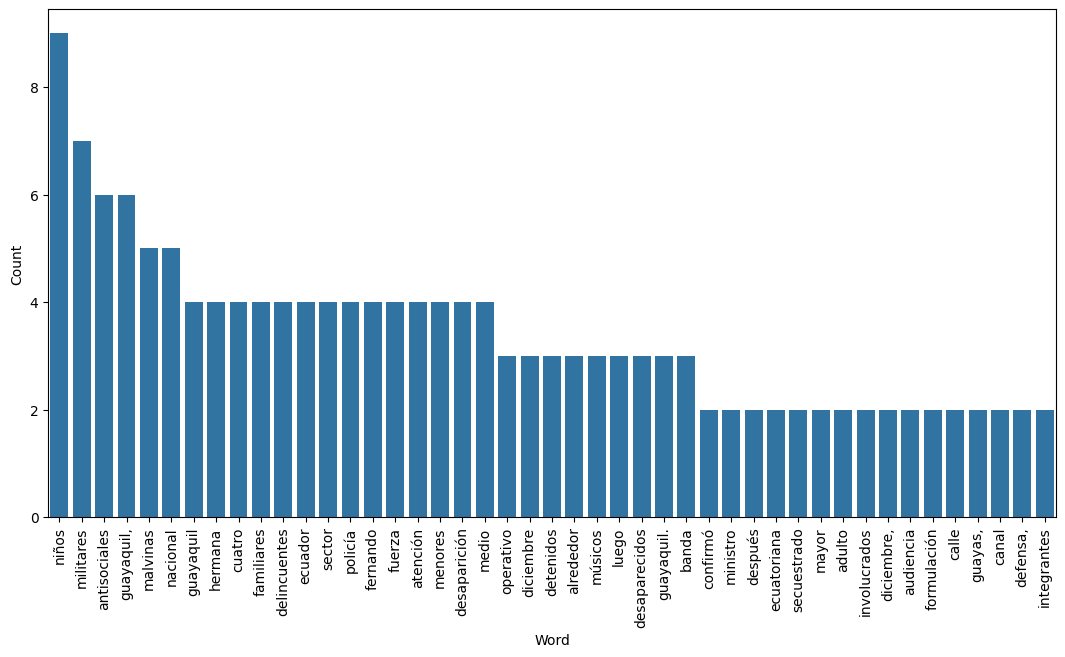

Wordcloud of description of 2024-12


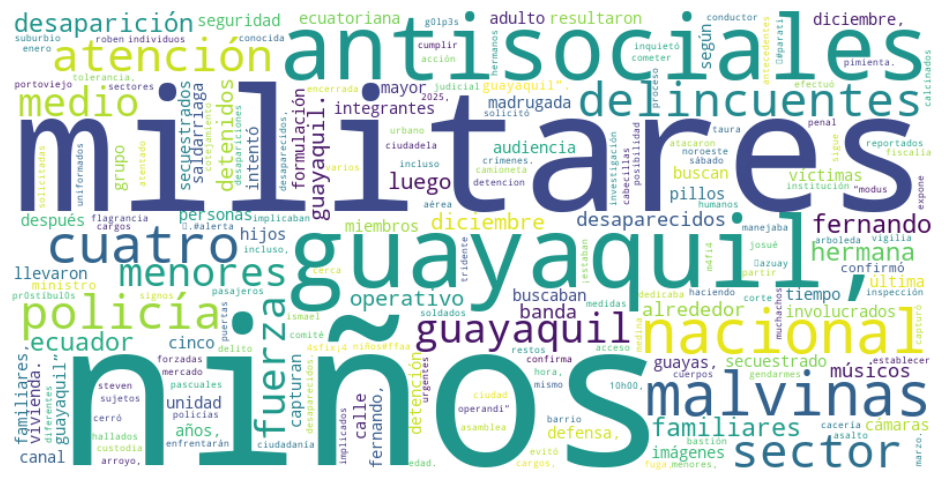

--------------------------------------------------
Plotting comments_text of 2025-01


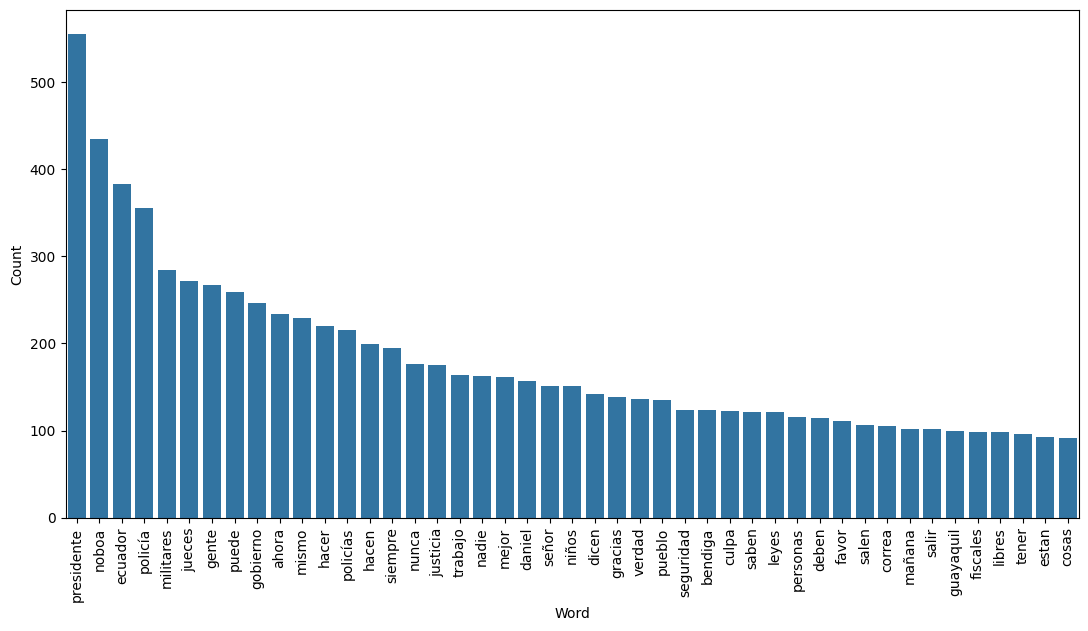

Wordcloud of comments_text of 2025-01


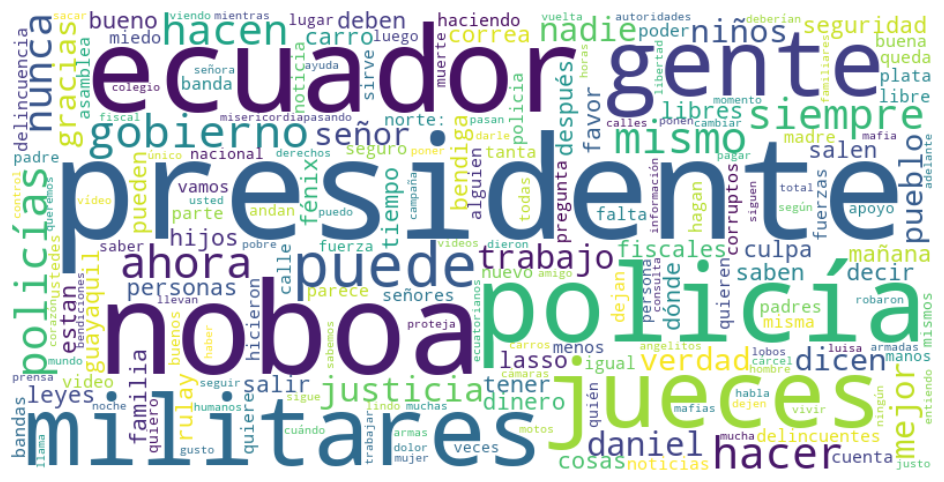

Plotting description of 2025-01


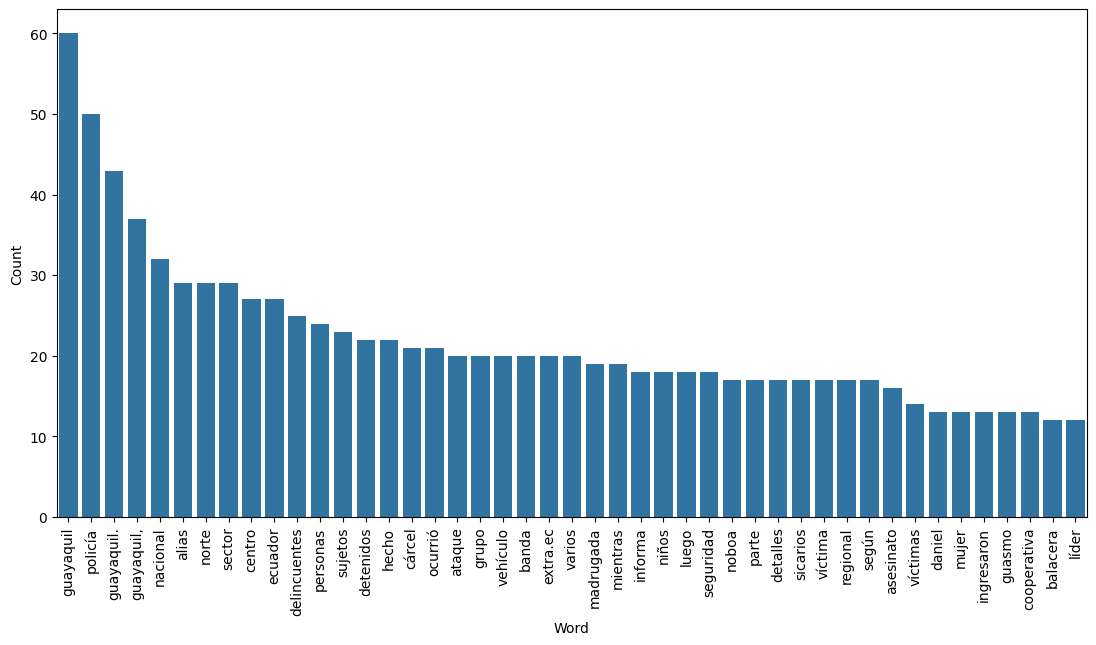

Wordcloud of description of 2025-01


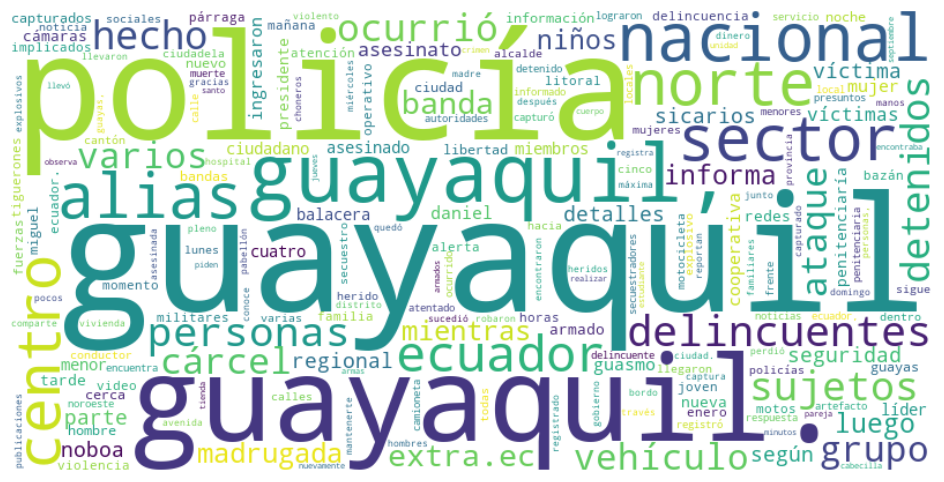

In [18]:
min_length_word = 4
num_bar = 45

print_plot('2023-11', min_length_word, num_bar)
print_plot('2024-11', min_length_word, num_bar)
print_plot('2024-12', min_length_word, num_bar)
print_plot('2025-01', min_length_word, num_bar)